In [48]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from math import pi
import random

In [68]:
def promise_function(fn_number):
    qc = QuantumCircuit(2)
    if not fn_number in [0, 1, 2, 3]:
        print("Not a valid function number")
        return qc

    if (fn_number & 1) != 0:
        qc.x(0)
        qc.cx(0, 1)
        qc.x(0)

    if (fn_number & 2) != 0:
        qc.cx(0, 1)
    
    return qc

In [69]:
def try_promise(fn_number, ini):
    qc = QuantumCircuit(2)
    if ini == 1:
        qc.x(1)
    qc = qc.compose(promise_function(fn_number))

    state = Statevector.from_instruction(qc)
    return state

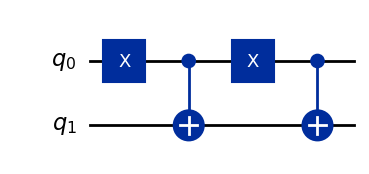

<IPython.core.display.Latex object>

In [70]:
display(promise_function(3).draw(output="mpl"))

try_promise(3, 0).draw('latex')

In [71]:
def deutsch_circuit(fn_number):
    qc = QuantumCircuit(QuantumRegister(2, "q"), ClassicalRegister(1, "c"))

    # prep the circuit
    qc.x(1)
    qc.barrier()
    
    # initialise superposition
    qc.h(0)
    qc.h(1)
    qc.barrier()

    # do deutsch operation
    qc = qc.compose(promise_function(fn_number))
    qc.barrier()
    
    # last hadamard
    qc.h(0)

    qc.measure(0, 0)

    return qc

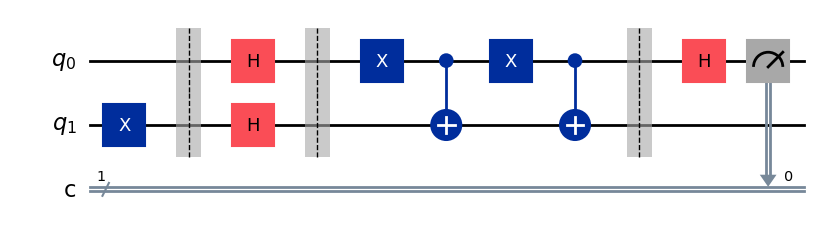

In [72]:
display(deutsch_circuit(3).draw(output="mpl"))

In [96]:
def is_balanced(fn_number):
    if (fn_number in [0, 3]):
        return "0"
    return "1"

In [99]:
def try_game(fn_number):
    qc = deutsch_circuit(fn_number)

    result = AerSimulator().run(qc, shots=1).result()
    statistics = result.get_counts()

    bits = list(statistics.keys())[0]
    a = bits[0]
    #display(qc.draw(output="mpl"))

    return a == is_balanced(fn_number)

In [100]:
for i in range(0, 4):
    if not try_game(i):
        print("failed on " + str(i))
    else:
        print(str(i) + " is okay")

0 is okay
1 is okay
2 is okay
3 is okay
